# Data Visualization Using `plotnine`

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [1]:
import statsmodels.api as sm
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_histogram, geom_point, geom_line, geom_density, geom_bar
import seaborn as sns
import matplotlib.pyplot as plt

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [2]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [3]:
df["am"] = df["am"].astype('category')
#engine type
df["vs"] = df["vs"].astype('category')
#cylinders
df["cyl"] = df["cyl"].astype('category')
#print data types
print(df.dtypes)

mpg      float64
cyl     category
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs      category
am      category
gear       int64
carb       int64
dtype: object


If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?

Yes, it is clear that the variables have been converted to text values because the vs, cyl, and am, are represented as categorical variable from their data types even though their values are numerically represented. The other data types are integers and floats indicating continuous or decimal numbers.

It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

    a. Boxplot of am as Categorical:
The plot is more informative because the categories are separated by: 0 (automic transmission) and 1 (manual transmission) with each transmission type having its own distinct box plot making it easy to compare the mpg of automatic vs. manual transmission.

    b. Boxplot of am as Flot:
The plot is less infomative because the x-axis (am) is represented as numerical values instead of categorical labels, which makes it hard to represent the different transmission type (automatic and manual) which makes this data visualization less meaningful for a categorical variable.



2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

    a. Histogram of cyl as a Categorical:
The histogram is more meaningful and clearly shows how the distributions vary by group. It is able to distinguish the cylinder categories (4,6, and 8) with different colors, providing a clear comparison of the horespower distribution for each cylinder group. Each cylinder category has disntict sections, making the differences between them interpretable.

    b. Historgram of cyl as a Float:
THe histogram is less meaningful because the data is not continuous and the distinction between the cylinder groups becomes less clear. The continous scale iplies a non-categorical relationshup, which isn't meaning fule since cylinder values are discrete. There's also no seperation of the cylinder categories by color.



<ipython-input-4-105271a78f0c>:14: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


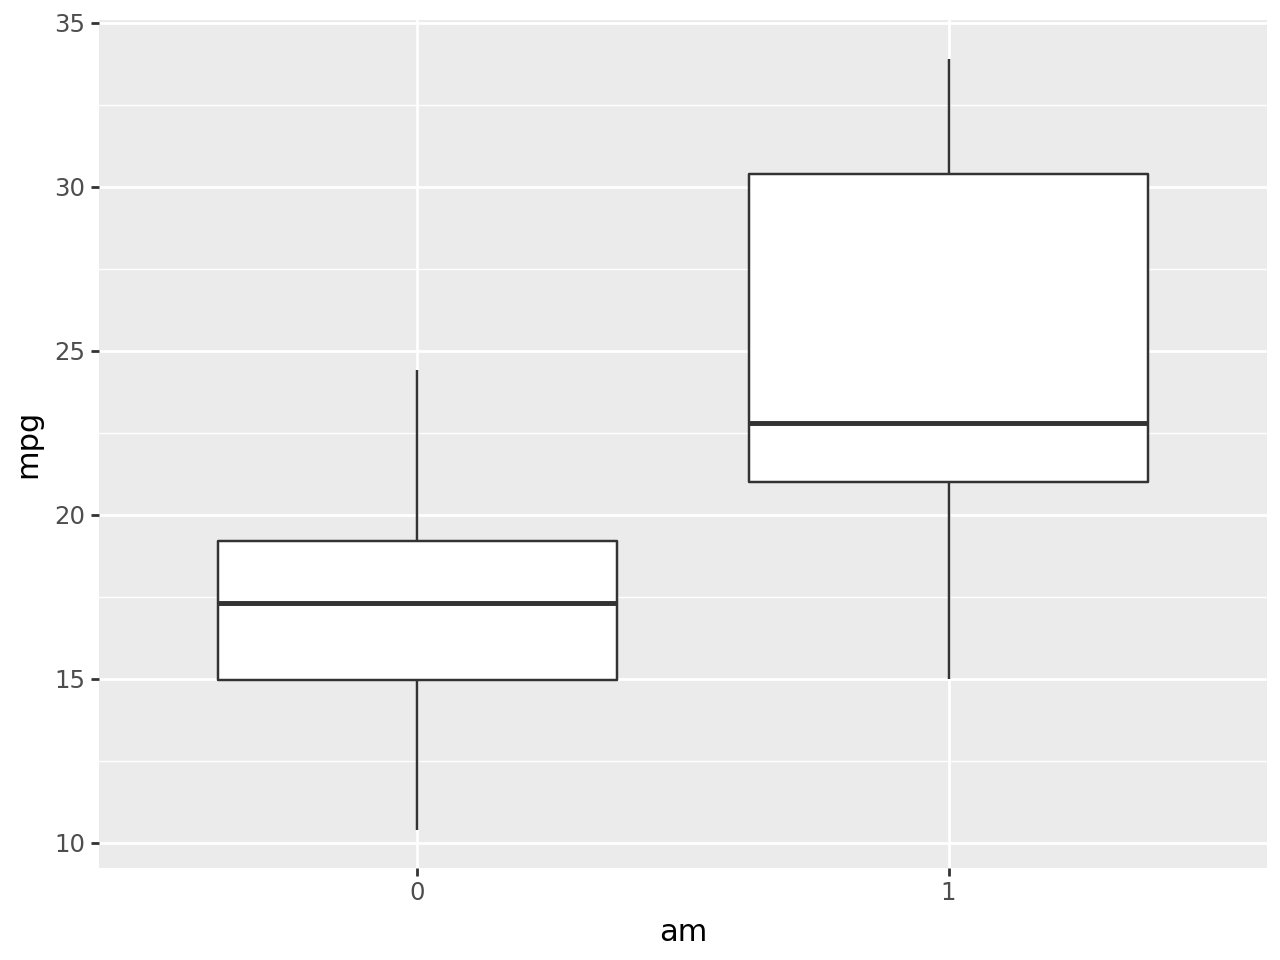

<ipython-input-4-105271a78f0c>:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


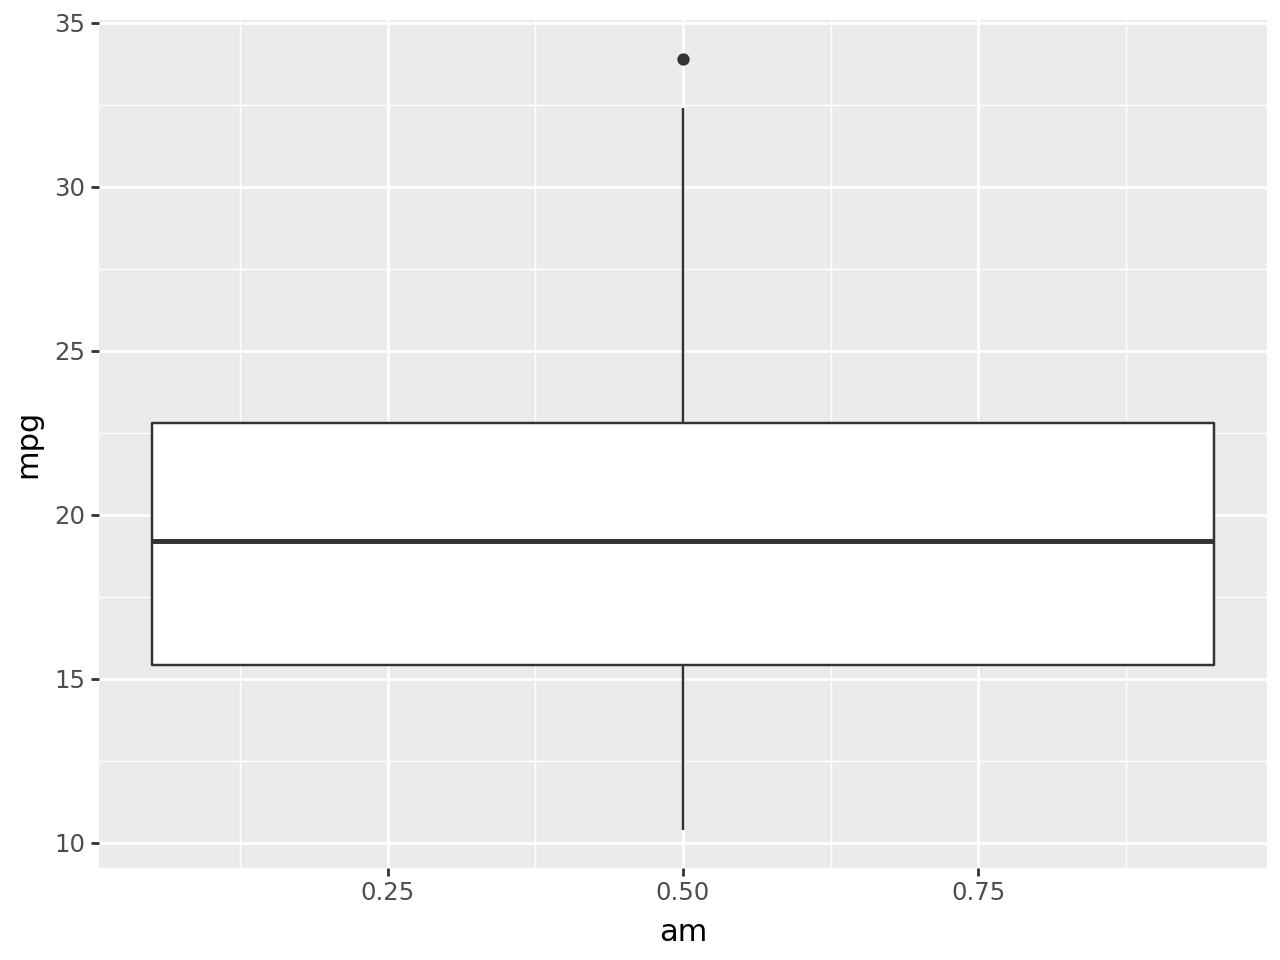

In [4]:
# 1. Side-By-Side Boxplots of am as categorical and float:
# am as categorical
catplotam = (ggplot(df,
aes(
  x=df['am'].astype('category'), y = "mpg"))
+ geom_boxplot()
)
#am as float
fltplotam = (ggplot(df,
       aes(x=df['am'].astype(float), y="mpg"))
+ geom_boxplot()
)
# print plots
print(catplotam)
print(fltplotam)

<ipython-input-5-48cba9d9d0c0>:15: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


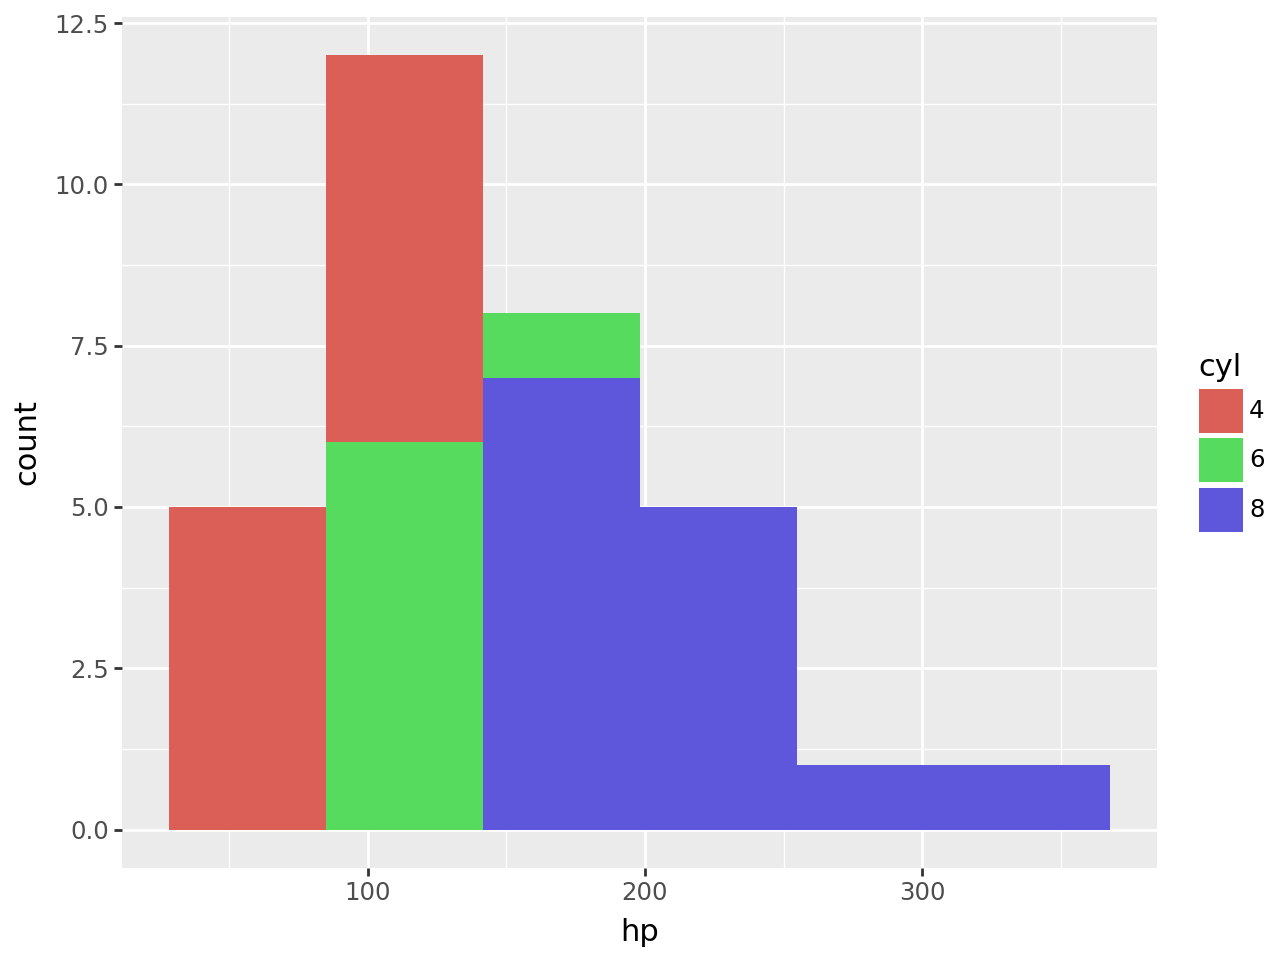

<ipython-input-5-48cba9d9d0c0>:16: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


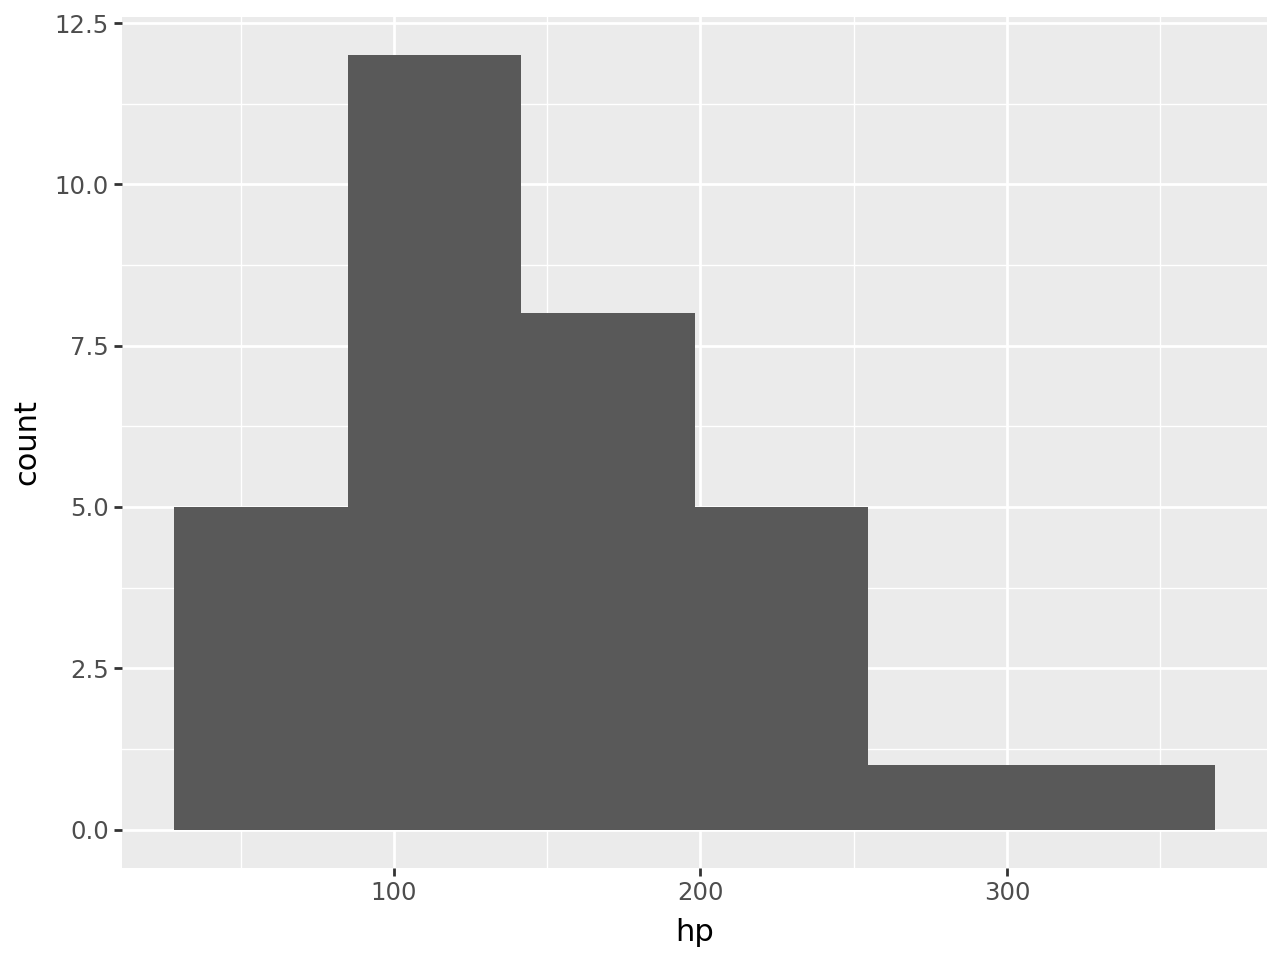

In [5]:
# 2. Histograms of hp Variable for Different Values of cyl

# cyl as categorical
df["cyl"] = df["cyl"].astype('category')
catplotcyl = (ggplot(df,
                    aes(x="hp", fill="cyl"))
             + geom_histogram())

# cyl as float
df["cyl_f"] = df["cyl"].astype(float)
fltplotcyl = (ggplot(df,
                    aes(x="hp", fill="cyl_f"))
             + geom_histogram())
# print plots
print(catplotcyl)
print(fltplotcyl)

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

<ipython-input-6-9764c770c277>:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


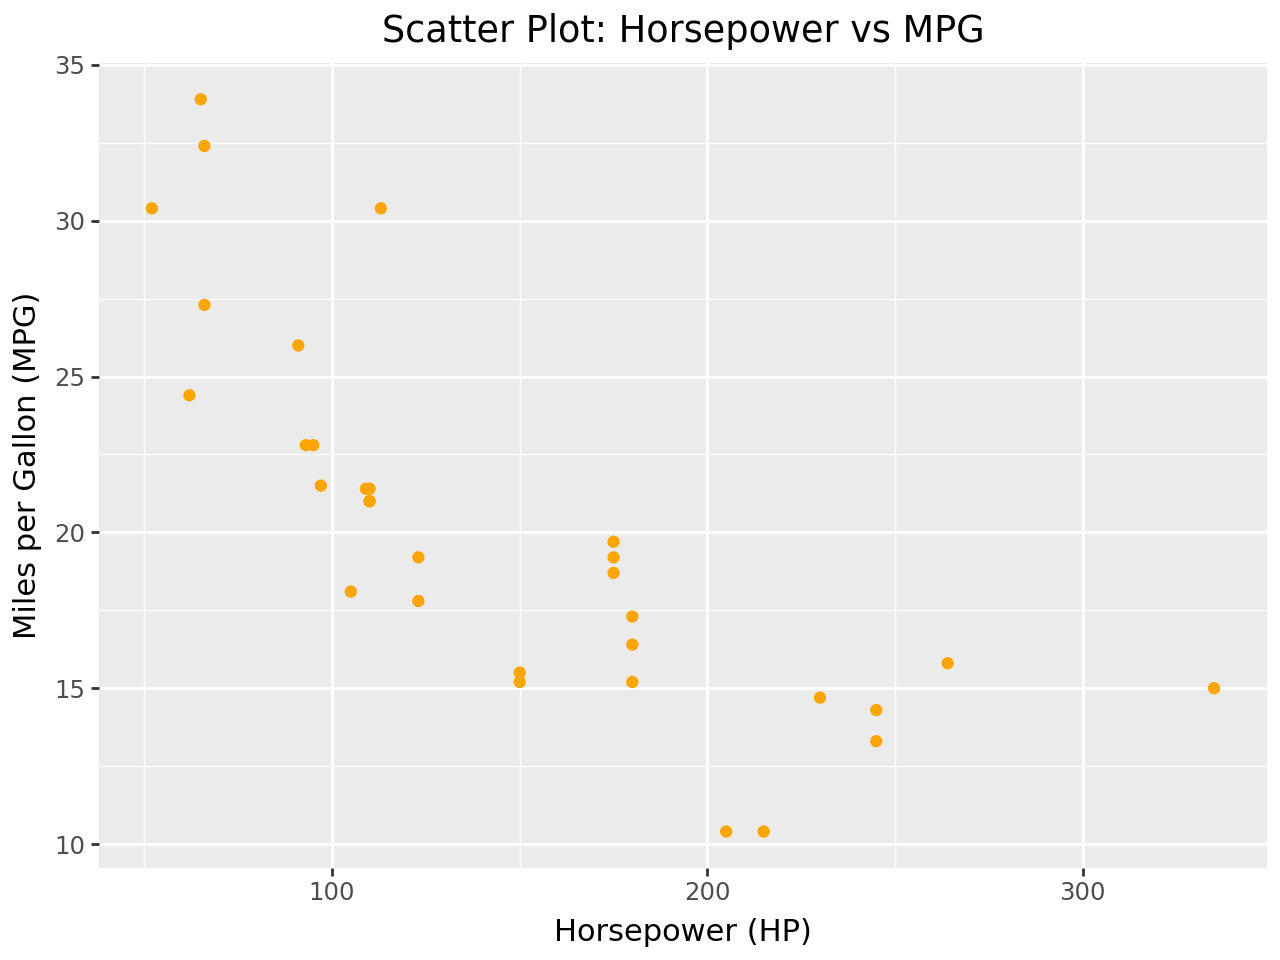

In [6]:
# First Geometry: Scatterplot

from plotnine import ggplot, aes, geom_point, labs

scatter_plot = (
    ggplot(df, aes(x='hp', y='mpg')) +
    geom_point(color='orange') +
    labs(title='Scatter Plot: Horsepower vs MPG', x='Horsepower (HP)', y='Miles per Gallon (MPG)')
)

print(scatter_plot)


<ipython-input-7-188a336a9e1e>:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


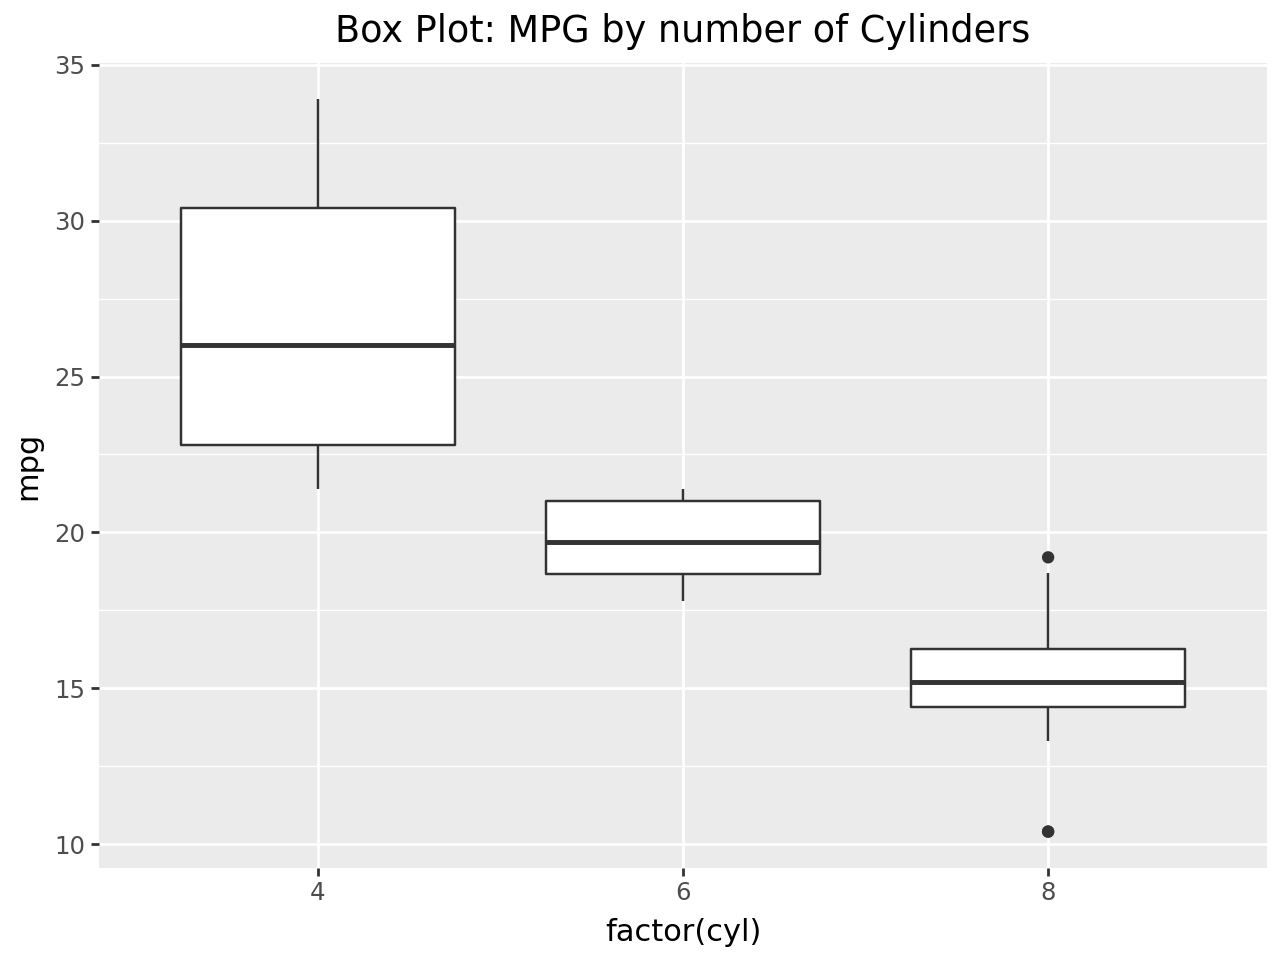

In [7]:
# Second Geometry: Box Plot
from plotnine import ggplot, aes, geom_boxplot, labs
box_plot = (ggplot(df,
    aes( x = "factor(cyl)", y = 'mpg'))
+ geom_boxplot() + labs(title='Box Plot: MPG by number of Cylinders'))
print(box_plot)

<ipython-input-8-3b062c1d7469>:8: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


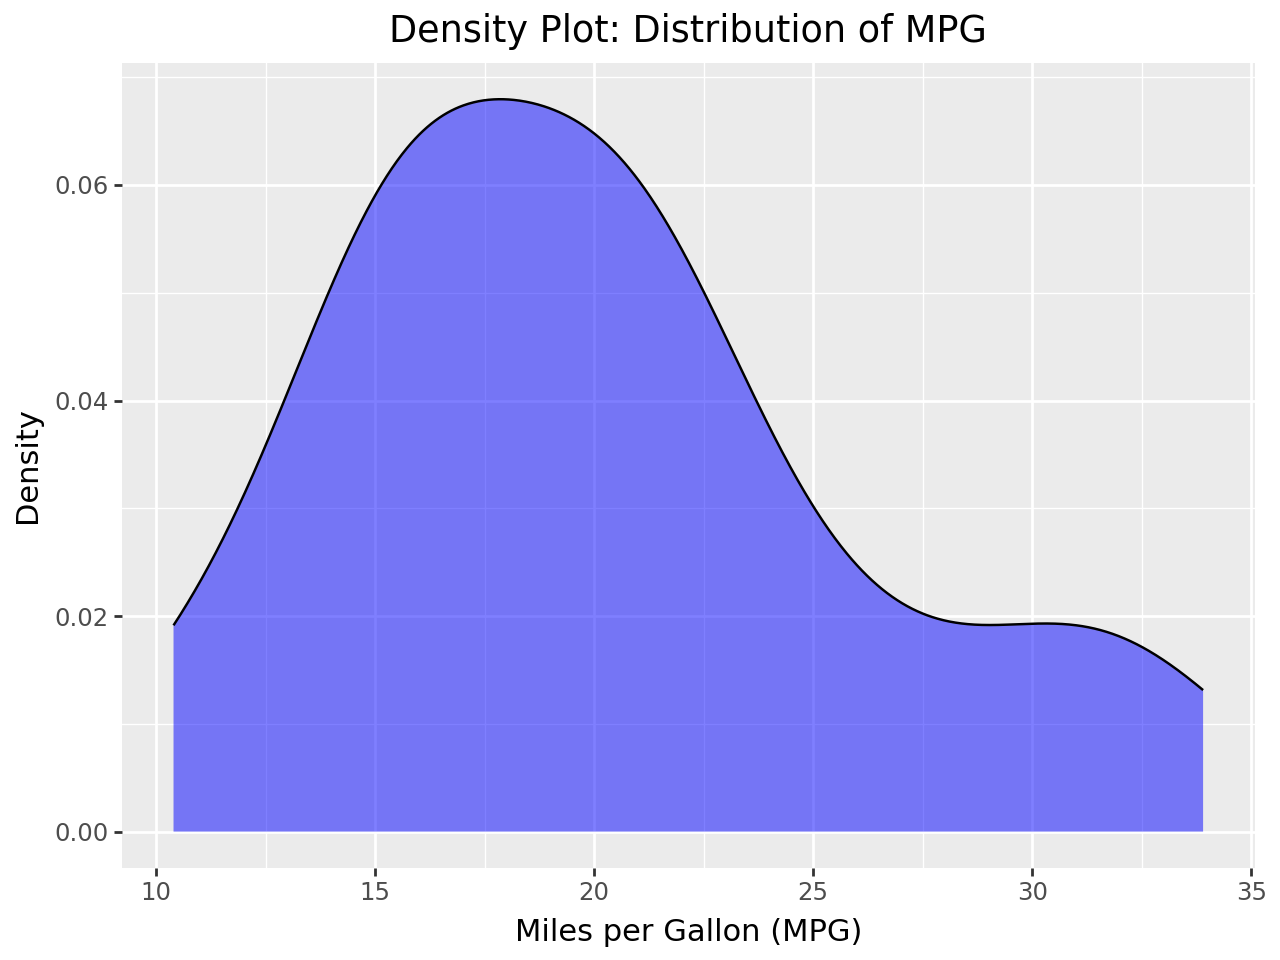

In [8]:
from plotnine import ggplot, aes, geom_density, labs

density_plot = (
    ggplot(df, aes(x='mpg')) +
    geom_density(fill='blue', alpha=0.5) +
    labs(title='Density Plot: Distribution of MPG', x='Miles per Gallon (MPG)', y='Density')
)
print(density_plot)
